Adapted from
https://github.com/cliburn/sta-663-2016/blob/master/lectures/14_ExpectationMaximization.ipynb

by marco.piastra@unipv.it

Expectation Maximization
====

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print(np.__version__)

1.26.4


In [2]:
np.random.seed(1234)
np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [ ]:
from IPython.display import Image
from numpy.core.umath_tests import matrix_multiply as mm

### First explicit solution

In [4]:
def mn_ll(y, theta, axis=None):
    """Log likelihood for multinomial distribution (ignoring constant)."""
    return np.sum(y * np.log(theta), axis=axis)

def ll(y, theta, p):
    """Complete log likelihood for mixture."""
    return np.sum(p * mm_ll(y, theta))

def normalize(xs, axis=1):
    """Return normalized matrix so that sum of row or column (default) entries = 1."""
    if axis==0:
        return xs/xs.sum(0)
    else:
        return xs/xs.sum(1)[:, None]

In [6]:
# Ground Truth (see article):
# thetas = np.array([[0.80, 0.20], [0.52, 0.48]])

xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
# Initial (random) guess
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100
verbose = True

ll_old = 0
for i in range(max_iter):
    exp_A = []
    exp_B = []

    lls_A = []
    lls_B = []

    ws_A = []
    ws_B = []

    ll_new = 0

    if verbose:
        print()
        print("* Iteration: %d" % (i+1))

    if verbose:
        print()
        print(f"thetas[0]: {thetas[0]}")
        print(f"thetas[1]: {thetas[1]}")

    # E-step: calculate probability distributions over possible completions
    for x in xs:

        ll_A = mn_ll(x, thetas[0])
        ll_B = mn_ll(x, thetas[1])

        lls_A.append(ll_A)
        lls_B.append(ll_B)

        denom = np.exp(ll_A) + np.exp(ll_B)
        w_A = np.exp(ll_A)/denom
        w_B = np.exp(ll_B)/denom

        if verbose:
            print(f"x: {x}")
            print(f"w_A: {w_A}")
            print(f"w_B: {w_B}")

        ws_A.append(w_A)
        ws_B.append(w_B)

        exp_A.append(np.dot(w_A, x))
        exp_B.append(np.dot(w_B, x))

        # update complete log likelihood
        ll_new += w_A * ll_A + w_B * ll_B

    # M-step: update values for parameters given current distribution
    thetas[0] = np.sum(exp_A, 0)/np.sum(exp_A)
    thetas[1] = np.sum(exp_B, 0)/np.sum(exp_B)

    # print distribution of z for each x and current parameter estimate
    print()
    print("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new))

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new


* Iteration: 1

thetas[0]: [0.600 0.400]
thetas[1]: [0.500 0.500]
x: [5.000 5.000]
w_A: 0.4491489261009366
w_B: 0.5508510738990634
x: [9.000 1.000]
w_A: 0.804985517232276
w_B: 0.19501448276772404
x: [8.000 2.000]
w_A: 0.7334671580091431
w_B: 0.26653284199085686
x: [4.000 6.000]
w_A: 0.35215613384625916
w_B: 0.6478438661537408
x: [7.000 3.000]
w_A: 0.6472151158991253
w_B: 0.3527848841008748

theta_A = 0.71, theta_B = 0.58, ll = -32.69

* Iteration: 2

thetas[0]: [0.713 0.287]
thetas[1]: [0.581 0.419]
x: [5.000 5.000]
w_A: 0.2958193247633623
w_B: 0.7041806752366379
x: [9.000 1.000]
w_A: 0.8115104471803285
w_B: 0.18848955281967159
x: [8.000 2.000]
w_A: 0.7064220117463049
w_B: 0.2935779882536951
x: [4.000 6.000]
w_A: 0.1901445386208639
w_B: 0.809855461379136
x: [7.000 3.000]
w_A: 0.573533931882818
w_B: 0.4264660681171821

theta_A = 0.75, theta_B = 0.57, ll = -31.26

* Iteration: 3

thetas[0]: [0.745 0.255]
thetas[1]: [0.569 0.431]
x: [5.000 5.000]
w_A: 0.2175923167702117
w_B: 0.7824076832

### Vectorizing ...

In [7]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100

ll_old = -np.infty
for i in range(max_iter):
    ll_A = np.sum(xs * np.log(thetas[0]), axis=1)
    ll_B = np.sum(xs * np.log(thetas[1]), axis=1)
    denom = np.exp(ll_A) + np.exp(ll_B)
    w_A = np.exp(ll_A)/denom
    w_B = np.exp(ll_B)/denom

    exp_A = w_A[:, None] * xs
    exp_B = w_B[:, None] * xs

    thetas[0] = np.sum(exp_A, 0)/np.sum(exp_A)
    thetas[1] = np.sum(exp_B, 0)/np.sum(exp_B)

    ll_new = w_A.dot(ll_A) + w_B.dot(ll_B)

    print("Iteration: %d" % (i+1))
    print("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new))

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new

Iteration: 1
theta_A = 0.71, theta_B = 0.58, ll = -32.69
Iteration: 2
theta_A = 0.75, theta_B = 0.57, ll = -31.26
Iteration: 3
theta_A = 0.77, theta_B = 0.55, ll = -30.76
Iteration: 4
theta_A = 0.78, theta_B = 0.53, ll = -30.33
Iteration: 5
theta_A = 0.79, theta_B = 0.53, ll = -30.07
Iteration: 6
theta_A = 0.79, theta_B = 0.52, ll = -29.95
Iteration: 7
theta_A = 0.80, theta_B = 0.52, ll = -29.90
Iteration: 8
theta_A = 0.80, theta_B = 0.52, ll = -29.88
Iteration: 9
theta_A = 0.80, theta_B = 0.52, ll = -29.87


### Writing as a function

In [8]:
def em(xs, thetas, max_iter=100, tol=1e-6):
    """Expectation-maximization for coin sample problem."""

    ll_old = -np.infty
    for i in range(max_iter):
        ll = np.array([np.sum(xs * np.log(theta), axis=1) for theta in thetas])
        lik = np.exp(ll)
        ws = lik/lik.sum(0)
        exps = np.array([w[:, None] * xs for w in ws])
        thetas = np.array([expr.sum(0)/expr.sum() for expr in exps])
        ll_new = np.sum([w*l for w, l in zip(ws, ll)])
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new
    return i, thetas, ll_new

### Checking

In [9]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

i, thetas, ll = em(xs, thetas)
print(i)
for theta in thetas:
    print(theta)
print(ll)

18
[0.797 0.203]
[0.520 0.480]
-29.86867615499925


Gaussian mixture models
----

A mixture of $k$ Gaussians has the following PDF

$$
\begin{align}
p(x) = \sum_{j=1}^k \alpha_j \phi(x; \mu_j, \Sigma_j)
\end{align}
$$

where $\alpha_j$ is the weight of the $j^\text{th}$ Gaussian component and

$$
\begin{align}
\phi(x; \mu, \Sigma) = \frac{1}{(2 \pi)^{d/2}|\Sigma|^{1/2}} \exp \left( -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \right)
\end{align}
$$

Suppose we observe $y_1, y2, \ldots, y_n$ as a sample from a mixture of Gaussians. The log-likelihood is then

$$
\begin{align}
l(\theta) = \sum_{i=1}^n \log \left( \sum_{j=1}^k \alpha_j \phi(y_i; \mu_j, \Sigma_j) \right)
\end{align}
$$

where $\theta = (\alpha, \mu, \Sigma)$

There is no closed form for maximizing the parameters of this log-likelihood, and it is hard to maximize directly because the sum is inside the log function.

Using EM
----

Suppose we augment with the latent variable $z$ that indicates which of the $k$ Gaussians our observation $y$ came from. The derivation of the E and M steps are the same as for the toy example, only with more algebra.

For the E-step, we want to calculate the posterior probability that point $x_i$ belongs in cluster $j$, given the parameters $\theta = (\alpha, \mu, \Sigma)$

$$
\begin{align}
w_j^i &= Q_i(z^i = j) \\
&= p(z^i = j \mid y^i; \theta) \\
&= \frac{p(x^i \mid z^i = j; \mu, \Sigma) p(z^i = j; \alpha)}  {\sum_{l=1}^k{p(y^i \mid z^i = l; \mu, \Sigma) p(z^i = l; \alpha)}}  && \text{Bayes' rule} \\
&= \frac{\phi(x^i; \mu_j, \Sigma_j) \alpha_j}{\sum_{l=1}^k \phi(x^i; \mu_l, \Sigma_l) \alpha_l}
\end{align}
$$

For the M-step, we have to find $\theta = (w, \mu, \Sigma)$ that maximizes the function that is a lower bound for the true log likelihood

$$
\begin{align}
\sum_{i=1}^{m}\sum_{j=1}^{k} Q(z^i=j) \log \frac{p(x^i \mid z^i= j; \mu, \Sigma) p(z^i=j; \alpha)}{Q(z^i=j)}
\end{align}
$$

By taking derivatives with respect to $(w, \mu, \Sigma)$ respectively and solving (remember to use Lagrange multipliers for the constraint that $\sum_{j=1}^k w_j = 1$), we get

$$
\begin{align}
\alpha_j &= \frac{1}{m} \sum_{i=1}^{m} w_j^i \\
\mu_j &= \frac{\sum_{i=1}^{m} w_j^i x^i}{\sum_{i=1}^{m} w_j^i} \\
\Sigma_j &= \frac{\sum_{i=1}^{m} w_j^i (x^i - \mu)(x^i - \mu)^T}{\sum_{i1}^{m} w_j^i}
\end{align}
$$

In [10]:
from scipy.stats import multivariate_normal as mvn

def normalize(xs, axis=None):
    """Return normalized marirx so that sum of row or column (default) entries = 1."""
    if axis is None:
        return xs/xs.sum()
    elif axis==0:
        return xs/xs.sum(0)
    else:
        return xs/xs.sum(1)[:, None]

def mix_mvn_pdf(xs, pis, mus, sigmas):
    return np.array([pi*mvn(mu, sigma).pdf(xs) for (pi, mu, sigma) in zip(pis, mus, sigmas)])

In [11]:
def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

Vectorized version
----

In [23]:
def em_gmm_vect(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs)
        ws /= ws.sum(0)

        # M-step
        pis = ws.sum(axis=1)
        pis /= n

        mus = np.dot(ws, xs)
        mus /= ws.sum(1)[:, None]

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = xs - mus[j, :]
            sigmas[j] = (ws[j,:,None,None] * np.matmul(ys[:,:,None], ys[:,None,:])).sum(axis=0)
#            sigmas[j] = (ws[j,:,None,None] * mm(ys[:,:,None], ys[:,None,:])).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:,None,None]

        # update complete log likelihoood
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(xs)
        ll_new = np.log(ll_new).sum()

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

Comparison of EM routines
----

In [20]:
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

# initial guesses for parameters
pis = normalize(np.random.random(2))
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)

In [14]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

CPU times: user 16.5 s, sys: 806 ms, total: 17.3 s
Wall time: 16.9 s


<ipython-input-21-98c775b17953>:13: UserWarning: The following kwargs were not used by contour: 'N'
  plt.contour(X, Y, z, N=10)


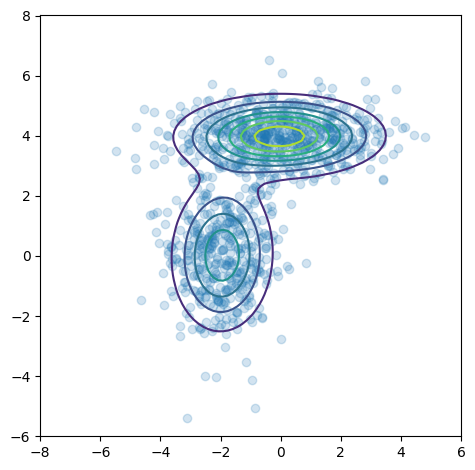

In [21]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z, N=10)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()

In [24]:
%%time
ll2, pis2, mus2, sigmas2 = em_gmm_vect(xs, pis, mus, sigmas)

CPU times: user 34.9 ms, sys: 64 µs, total: 35 ms
Wall time: 61.4 ms


<ipython-input-25-bc5d49b872ef>:13: UserWarning: The following kwargs were not used by contour: 'N'
  plt.contour(X, Y, z, N=10)


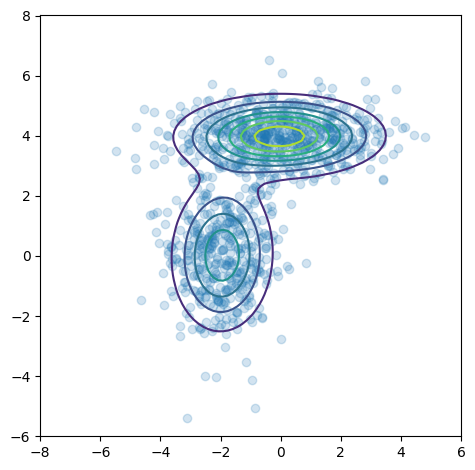

In [25]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis2, mus2, sigmas2):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z, N=10)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()